<a href="https://colab.research.google.com/github/thanhyx4/H-M-Personalized-Fashion-Recommendations/blob/main/Data_understand_RecSys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np # linear algebra
import os
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from os import listdir
from os.path import isfile, join

from termcolor import colored
from IPython.display import HTML

import warnings
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('float_format', '{:f}'.format)
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_article = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/H&M_RecSys/articles.csv")

df_tran = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/H&M_RecSys/transactions_train.csv")
df_cus =  pd.read_csv("/content/drive/MyDrive/Colab Notebooks/H&M_RecSys/customers.csv")

# P1: EDA

In [ ]:
print(f"Number of observations in ARTICLES: {colored(df_article.shape, 'yellow')}")
print(f"Number of observations in CUSTOMERS: {colored(df_cus.shape, 'yellow')}")
print(f"Number of observations in TRANSACTIONS: {colored(df_tran.shape, 'yellow')}")

Number of observations in ARTICLES: (105542, 25)
Number of observations in CUSTOMERS: (1048575, 7)
Number of observations in TRANSACTIONS: (31788324, 5)


In [ ]:
 def data_overview(df):           #khao sat data, null_data
  df_null = pd.DataFrame(df.isnull().sum().reset_index())
  df_null.columns = ['feature', 'qtd_null']
  df_null['percent_null'] = df_null['qtd_null']/len(df)
  df_null['dtype'] = df_null['feature'].apply(lambda x: df[x].dtype)

  return df_null


## 1. Article Understand

When we want to recommend a product to a customer, we need to know more about the product and understand the customer to make a quality recommendation

In [5]:
print(data_overview(df_article))

                         feature  qtd_null  percent_null   dtype
0                     article_id         0      0.000000   int64
1                   product_code         0      0.000000   int64
2                      prod_name         0      0.000000  object
3                product_type_no         0      0.000000   int64
4              product_type_name         0      0.000000  object
5             product_group_name         0      0.000000  object
6        graphical_appearance_no         0      0.000000   int64
7      graphical_appearance_name         0      0.000000  object
8              colour_group_code         0      0.000000   int64
9              colour_group_name         0      0.000000  object
10     perceived_colour_value_id         0      0.000000   int64
11   perceived_colour_value_name         0      0.000000  object
12    perceived_colour_master_id         0      0.000000   int64
13  perceived_colour_master_name         0      0.000000  object
14                 depart

### 1.1. Product Type Name

In [17]:
print(df_article['product_type_name'].value_counts().head())

Trousers    11169
Dress       10362
Sweater      9302
T-shirt      7904
Top          4155
Name: product_type_name, dtype: int64


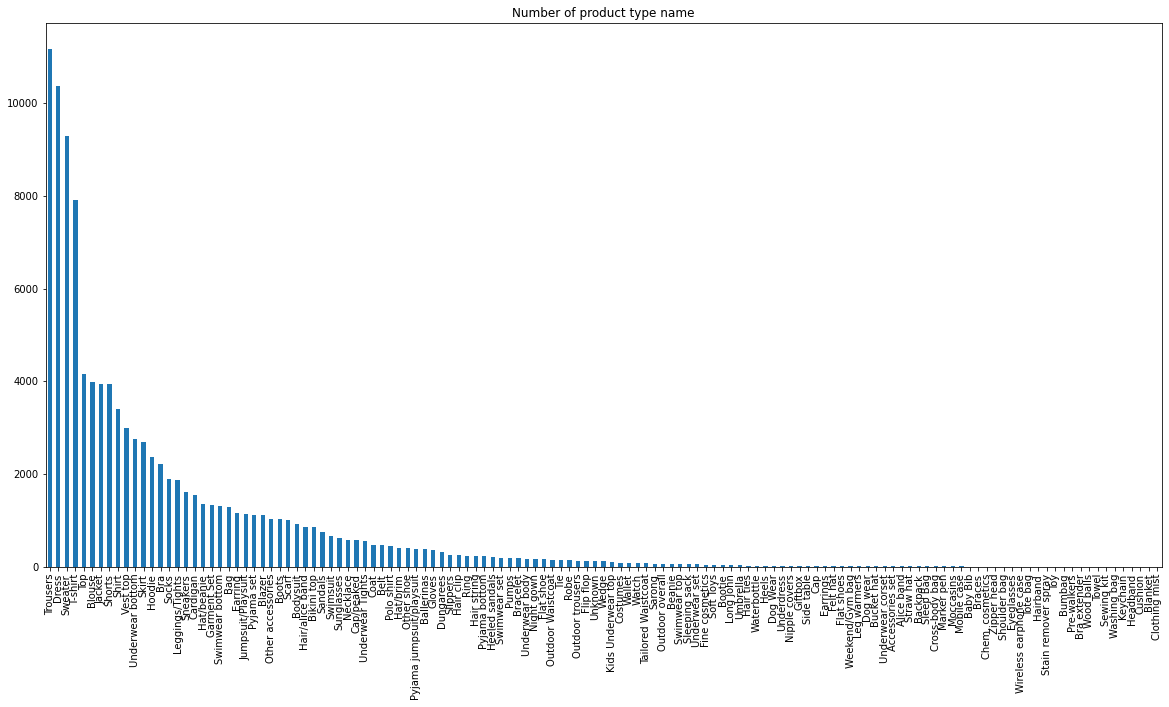

In [35]:
df_article['product_type_name'].value_counts().plot( kind='bar', figsize = (20,10), title = 'Number of product type name')


### 1.2. Product Group Name

In [38]:
print(df_article['product_group_name'].value_counts().head())

Garment Upper body    42741
Garment Lower body    19812
Garment Full body     13292
Accessories           11158
Underwear              5490
Name: product_group_name, dtype: int64


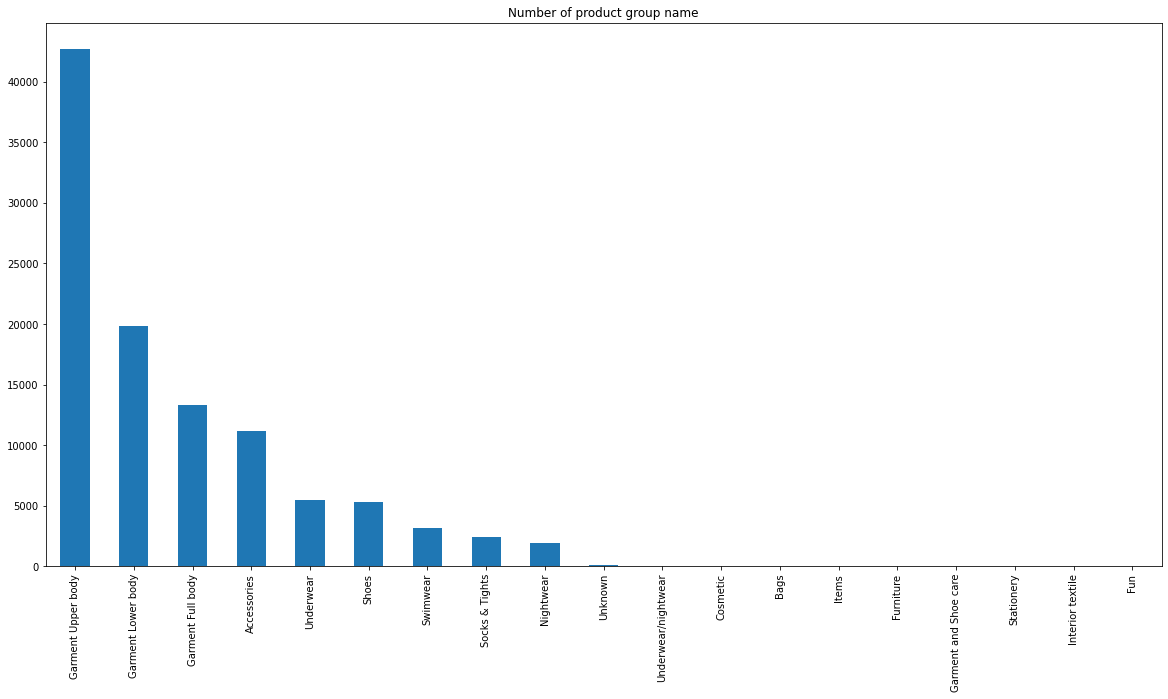

In [37]:
df_article['product_group_name'].value_counts().plot( kind='bar', figsize = (20,10), title = 'Number of product group name')

### 1.3. Graphical Appearance Name

In [39]:
print(df_article['graphical_appearance_name'].value_counts().head())

Solid               49747
All over pattern    17165
Melange              5938
Stripe               4990
Denim                4842
Name: graphical_appearance_name, dtype: int64


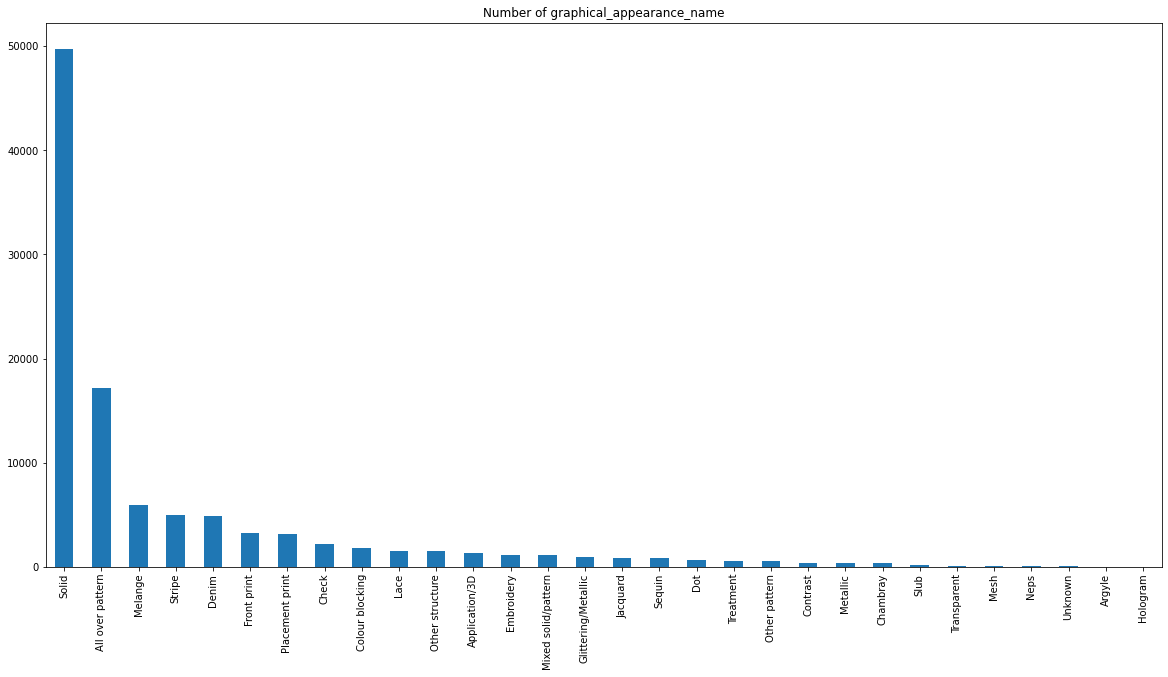

In [40]:
df_article['graphical_appearance_name'].value_counts().plot( kind='bar', figsize = (20,10), title = 'Number of graphical_appearance_name')

### 1.4. Color Group Name

In [41]:
print(df_article['colour_group_name'].value_counts().head())

Black         22670
Dark Blue     12171
White          9542
Light Pink     5811
Grey           4487
Name: colour_group_name, dtype: int64


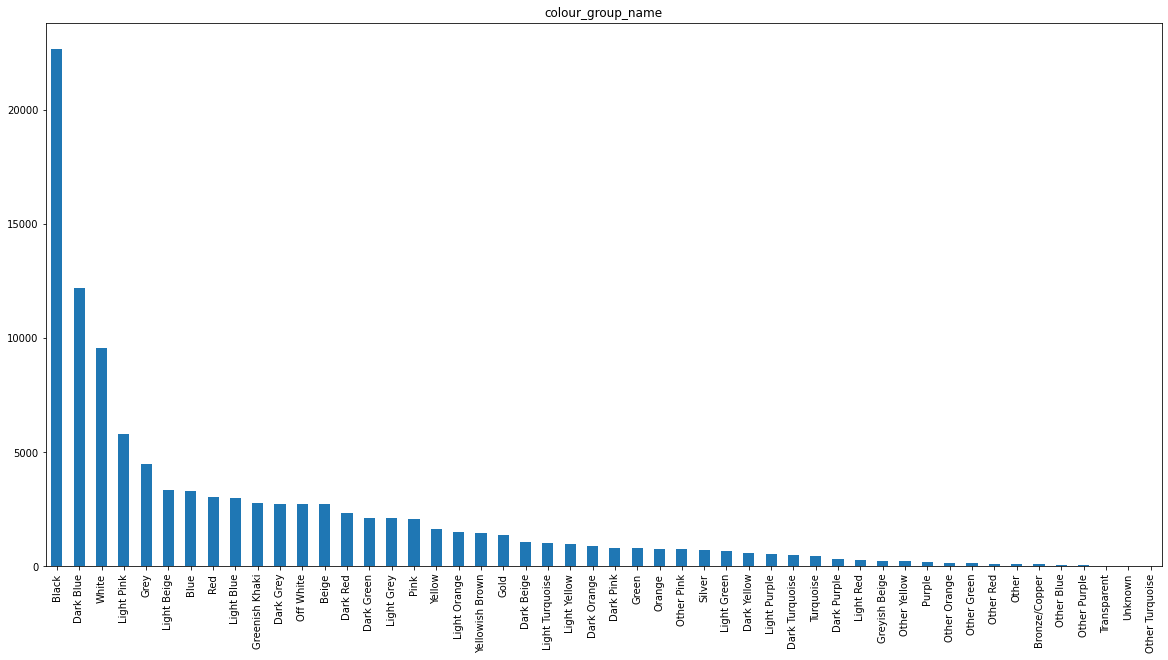

In [49]:
df_article['colour_group_name'].value_counts().plot( kind='bar', figsize = (20,10), title = 'colour_group_name')

### 1.5. Index Group Name, Index Name, Department Name

In [ ]:
#df_article.loc[df_article['index_name'] == 'Ladieswear', 'department_name'].unique()
department = pd.DataFrame(columns = [np.sort(df_article['index_name'].unique())])
for index_name in df_article['index_name'].unique():
  department[index_name] = pd.Series(df_article.loc[df_article['index_name'] == index_name , 'department_name'].unique())
department.head()

,Baby Sizes 50-98,"Children Accessories, Swimwear",Children Sizes 134-170,Children Sizes 92-140,Divided,Ladies Accessories,Ladieswear,Lingeries/Tights,Menswear,Sport
0,Baby basics,Kids Girl Big Acc,Young Girl Jersey Basic,Kids Boy Denim,UW,EQ & Special Collections,Jersey Basic,Clean Lingerie,Jersey Basic,Men Sport Woven
1,Baby Nightwear,Kids Girl Swimwear,Young Girl UW/NW,Kids Boy Jersey Basic,Divided Shoes,Hair Accessories,Jersey,Tights basic,Jacket Street,Men Sport Bottoms
2,Baby Socks,Young Girl Swimwear,Young Boy Jersey Basic,Kids Girl UW/NW,Basic 1,Other items,Knitwear,Casual Lingerie,Underwear Jersey,Men Sport Acc
3,Baby Toys/Acc,Kids Boy Swimwear,Young Girl S&T,Kids Girl S&T,Tops Knitwear DS,Belts,Woven bottoms,Shopbasket Socks,Shirt,Men Sport Tops
4,Baby Boy Outdoor,Young boy Swimwear,Young Boy Trouser,Kids Girl Jersey Basic,Small Accessories,Sunglasses,Trouser,Socks,Trouser,Ladies Sport Bras


In [ ]:
product_group = df_article['product_group_name'].unique()
product_group

array(['Garment Upper body', 'Underwear', 'Socks & Tights',
       'Garment Lower body', 'Accessories', 'Items', 'Nightwear',
       'Unknown', 'Underwear/nightwear', 'Shoes', 'Swimwear',
       'Garment Full body', 'Cosmetic', 'Interior textile', 'Bags',
       'Furniture', 'Garment and Shoe care', 'Fun', 'Stationery'],
      dtype=object)

In [ ]:
 section = df_article['section_name'].unique()
 section

array(['Womens Everyday Basics', 'Womens Lingerie',
       'Womens Nightwear, Socks & Tigh', 'Baby Essentials & Complements',
       'Men Underwear', 'Mama', 'Womens Small accessories',
       'Men H&M Sport', 'Kids Boy', 'Divided Basics',
       'Girls Underwear & Basics', 'Mens Outerwear',
       'Womens Big accessories', 'Divided Accessories',
       'Womens Swimwear, beachwear', 'Divided Selected',
       'Boys Underwear & Basics', 'Contemporary Street',
       'Contemporary Casual', 'Men Accessories', 'Men Suits & Tailoring',
       'Womens Everyday Collection', 'Men Shoes', 'Young Boy', 'H&M+',
       'Divided Collection', 'Ladies Denim', 'Contemporary Smart',
       'Womens Trend', 'Kids Outerwear', 'Young Girl', 'Womens Shoes',
       'Womens Tailoring', 'Divided Projects', 'Denim Men', 'Men Other',
       'Womens Jackets', 'Men Other 2', 'Baby Boy', 'Womens Casual',
       'Kids Accessories, Swimwear & D', 'Ladies H&M Sport',
       'Kids & Baby Shoes', 'Baby Girl', 'Kids Girl

In [ ]:
garment_group = df_article['garment_group_name'].unique()
garment_group

array(['Jersey Basic', 'Under-, Nightwear', 'Socks and Tights',
       'Jersey Fancy', 'Accessories', 'Trousers Denim', 'Outdoor',
       'Shoes', 'Swimwear', 'Knitwear', 'Shirts', 'Trousers', 'Dressed',
       'Shorts', 'Dresses Ladies', 'Skirts', 'Special Offers', 'Blouses',
       'Unknown', 'Woven/Jersey/Knitted mix Baby', 'Dresses/Skirts girls'],
      dtype=object)

## 2. Customer Understand

In [6]:
print(data_overview(df_cus))                #

                  feature  qtd_null  percent_null    dtype
0             customer_id         0      0.000000   object
1                      FN    683679      0.652008  float64
2                  Active    693339      0.661220  float64
3      club_member_status      4604      0.004391   object
4  fashion_news_frequency     12304      0.011734   object
5                     age     12120      0.011559  float64
6             postal_code         0      0.000000   object


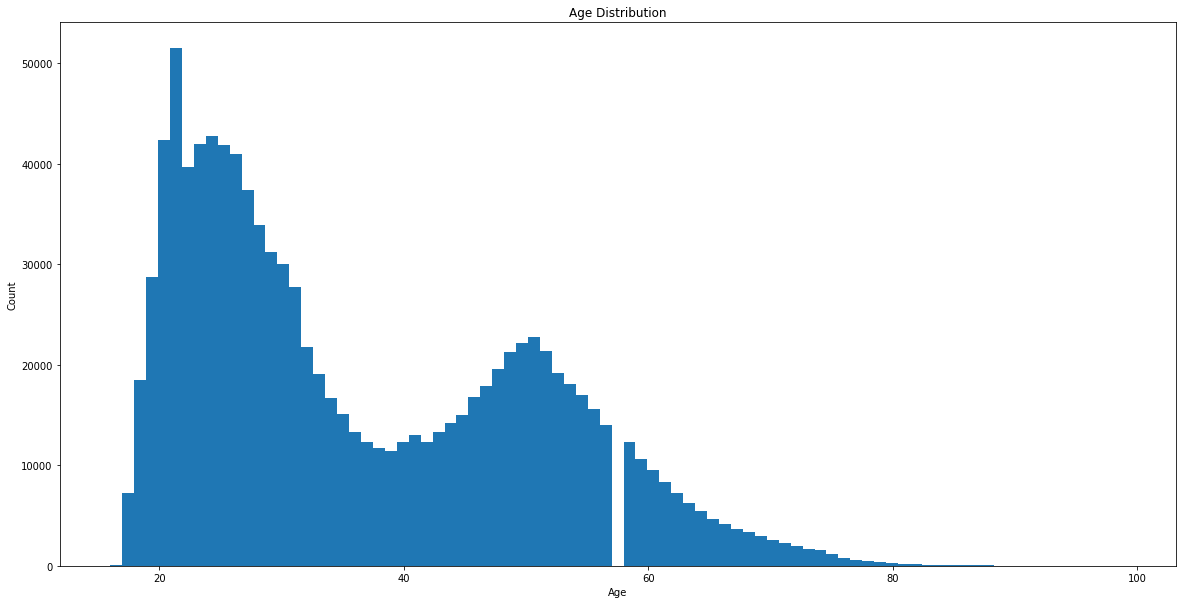

In [51]:
df_cus['age'].plot( kind='hist', figsize = (20,10), title = 'Age Distribution', bins=len(df_cus['age'].unique()))
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [52]:
df_cus['FN'].value_counts()

1.000000    364896
Name: FN, dtype: int64

In [54]:
df_cus['club_member_status'].value_counts()

ACTIVE        972599
PRE-CREATE     71024
LEFT CLUB        348
Name: club_member_status, dtype: int64

## 3. Transaction Understand

In [7]:
print(data_overview(df_tran))

            feature  qtd_null  percent_null    dtype
0             t_dat         0      0.000000   object
1       customer_id         0      0.000000   object
2        article_id         0      0.000000    int64
3             price         0      0.000000  float64
4  sales_channel_id         0      0.000000    int64


In [56]:
df_tran['sales_channel_id'].value_counts()      #on/off

2    22379862
1     9408462
Name: sales_channel_id, dtype: int64